# Required Libraries

In [1]:
%matplotlib inline

from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import yfinance as yf

# Setup The Variables

In [2]:
yesterday: str = (datetime.today() - timedelta(days=1)).strftime('%Y-%m-%d')
days_ago_hour: str = (datetime.today() - timedelta(days=720)).strftime('%Y-%m-%d')
today = datetime.today().strftime('%Y-%m-%d')


bull_start = "2020-01-01"
bull_end = "2021-11-30"

bear_start = "2021-11-30"
bear_end = "2022-11-30"

bond_ticker = "TLT"

# hourly
data_hour = yf.download(f"{bond_ticker}", start=days_ago_hour, end=today, interval = "1h") # only last 720 days allowed

# # daily - Bull run 1
# data_day = yf.download(f"{ticker}", start=bull_start, end=bull_end, interval = "1d")
# daily - Bear run 1
data_day = yf.download(f"{bond_ticker}", start=bear_start, end=bear_end, interval = "1d")


# print(data.index.day)
print(data_hour['Volume'])



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
2020-12-21 09:30:00    1829099
2020-12-21 10:30:00    1315346
2020-12-21 11:30:00     621008
2020-12-21 12:30:00    1014911
2020-12-21 13:30:00     625246
                        ...   
2022-12-09 12:30:00    3298747
2022-12-09 13:30:00    1790149
2022-12-09 14:30:00    3002908
2022-12-09 15:30:00    4956829
2022-12-09 16:00:00          0
Name: Volume, Length: 3471, dtype: int64


# Get Data

In [3]:
data_hour["log_return"] = np.log(data_hour["Adj Close"] / data_hour["Adj Close"].shift(1))
data_hour["hour"] = data_hour.index.hour


data_day["log_return"] = np.log(data_day["Adj Close"] / data_day["Adj Close"].shift(1))
data_day["day_of_month"] = data_day.index.day
data_day["year"] = data_day.index.year


# Results

## Hour

<AxesSubplot: title={'center': 'Mean Log Returns by Hour of the Day'}, xlabel='hour'>

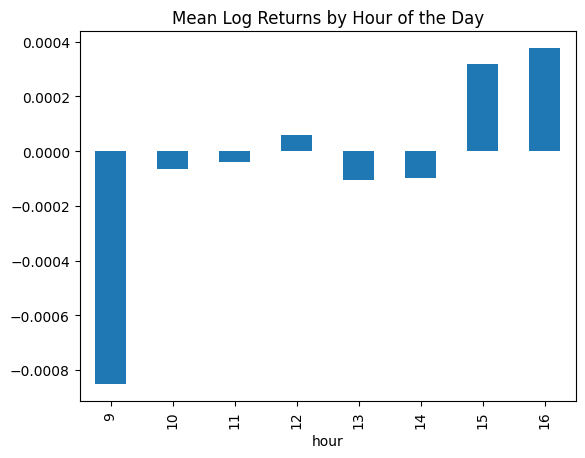

In [4]:
grouped_by_hour = data_hour.groupby("hour").log_return.mean()
grouped_by_hour.plot.bar(title="Mean Log Returns by Hour of the Day")

## Day

<AxesSubplot: title={'center': 'Mean Log Returns by Calendar Day of Month'}, xlabel='day_of_month'>

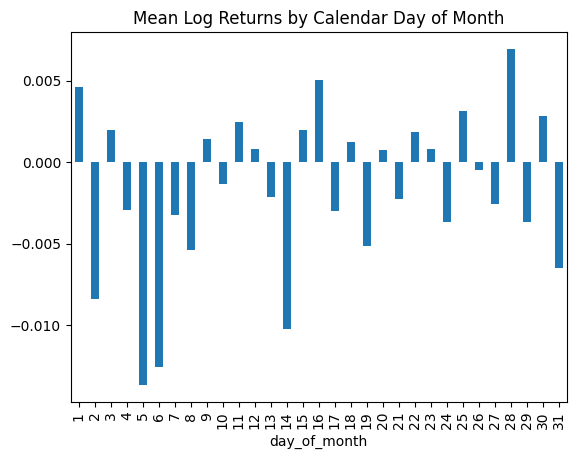

In [5]:
grouped_by_day = data_day.groupby("day_of_month").log_return.mean()
grouped_by_day.plot.bar(title="Mean Log Returns by Calendar Day of Month")

# Strategy

In [7]:
data_day["first_week_returns"] = 0.0
data_day.loc[data_day.day_of_month <= 7, "first_week_returns"] = data_day[
    data_day.day_of_month <= 7
].log_return

data_day["last_week_returns"] = 0.0
data_day.loc[data_day.day_of_month >= 23, "last_week_returns"] = data_day[
    data_day.day_of_month >= 23
].log_return

data_day["last_week_less_first_week"] = data_day.last_week_returns - data_day.first_week_returns

Year: Sum

<AxesSubplot: title={'center': 'Mean Log Strategy Returns by Year'}, xlabel='year'>

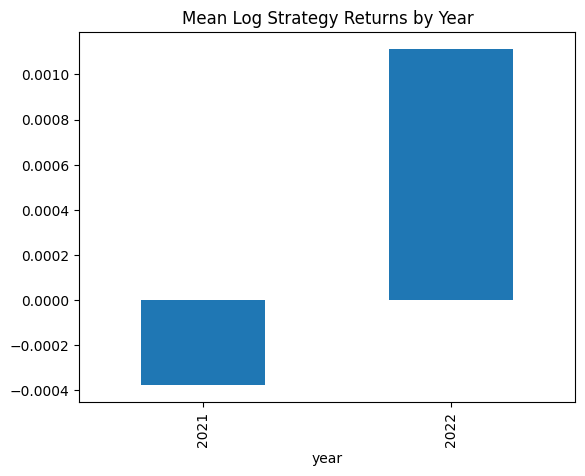

In [8]:
(
    data_day.groupby("year")
    .last_week_less_first_week.mean()
    .plot.bar(title="Mean Log Strategy Returns by Year")
)

Year: cumulative

<AxesSubplot: title={'center': 'Cumulative Sum of Returns By Year'}, xlabel='year'>

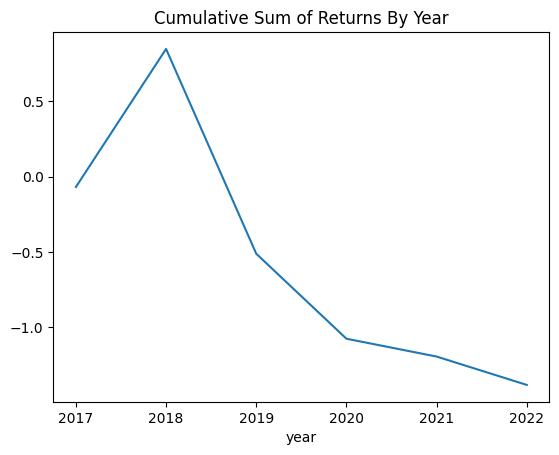

In [8]:
(
    data.groupby("year")
    .last_week_less_first_week.sum()
    .cumsum()
    .plot(title="Cumulative Sum of Returns By Year")
)

Year: by day

<AxesSubplot: title={'center': 'Cumulative Sum of Returns By Day'}, xlabel='Date'>

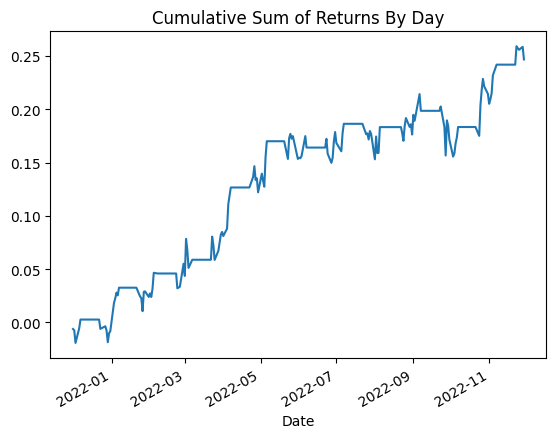

In [9]:
data_day.last_week_less_first_week.cumsum().plot(title="Cumulative Sum of Returns By Day")